In [205]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
ad=pd.read_csv('ad_click_dataset.csv')
ad

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1


In [12]:
ad.shape

(10000, 9)

In [14]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [22]:
ad.describe()

,id,age,click
count,10000.000000,5234.000000,10000.000000
mean,5060.211400,40.197363,0.650000
std,2861.758265,13.126420,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5218.000000,39.500000,1.000000
75%,7466.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


In [26]:
ad.isnull().sum()*100/ad.shape[0]

id                   0.00
full_name            0.00
age                 47.66
gender              46.93
device_type         20.00
ad_position         20.00
browsing_history    47.82
time_of_day         20.00
click                0.00
dtype: float64

In [34]:
ad.duplicated().sum()

2853

In [38]:
ad['gender'].value_counts()

gender
Female        1834
Male          1810
Non-Binary    1663
Name: count, dtype: int64

In [58]:
ad['device_type'].value_counts()

device_type
Desktop    2754
Mobile     2649
Tablet     2597
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

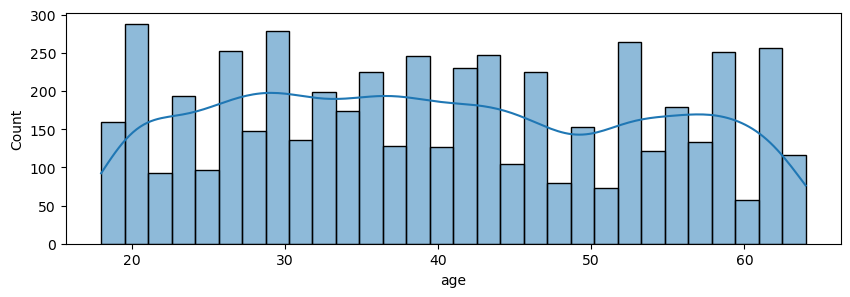

In [60]:
plt.figure(figsize=(10,3))
sns.histplot(x=ad['age'],kde=True,bins=30)

In [42]:
ad['ad_position'].value_counts()

ad_position
Bottom    2817
Top       2597
Side      2586
Name: count, dtype: int64

In [44]:
ad['browsing_history'].value_counts()

browsing_history
Entertainment    1175
Social Media     1054
Education        1029
Shopping          984
News              976
Name: count, dtype: int64

In [48]:
ad['time_of_day'].value_counts()

time_of_day
Morning      2126
Afternoon    2016
Evening      1958
Night        1900
Name: count, dtype: int64

In [50]:
ad['click'].value_counts()

click
1    6500
0    3500
Name: count, dtype: int64

<Figure size 1000x500 with 0 Axes>

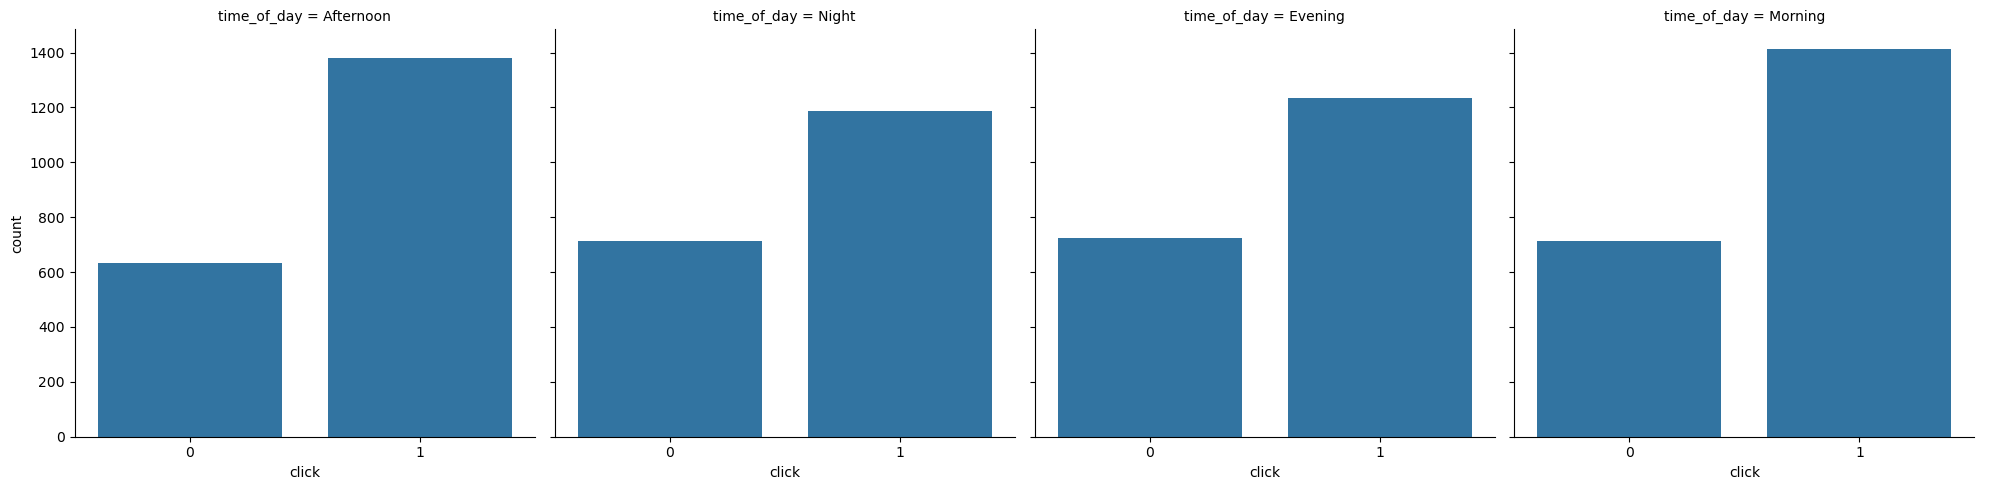

In [75]:
plt.figure(figsize=(10,5))
sns.catplot(x='click',col='time_of_day',data=ad,kind='count')

<Figure size 1000x500 with 0 Axes>

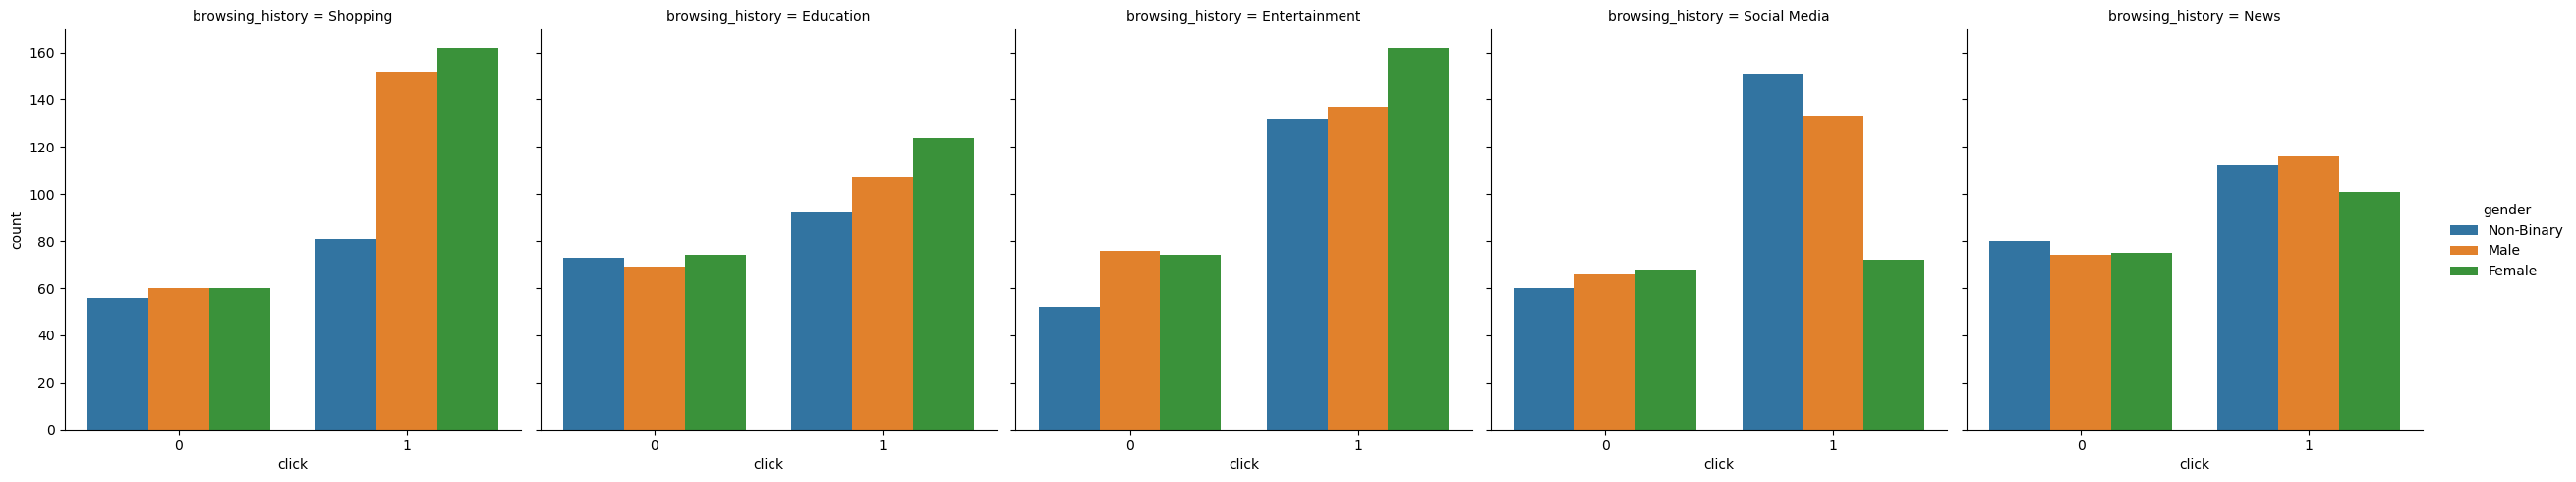

In [77]:
plt.figure(figsize=(10,5))
sns.catplot(x='click',col='browsing_history',hue='gender',data=ad,kind='count')

<Figure size 1000x500 with 0 Axes>

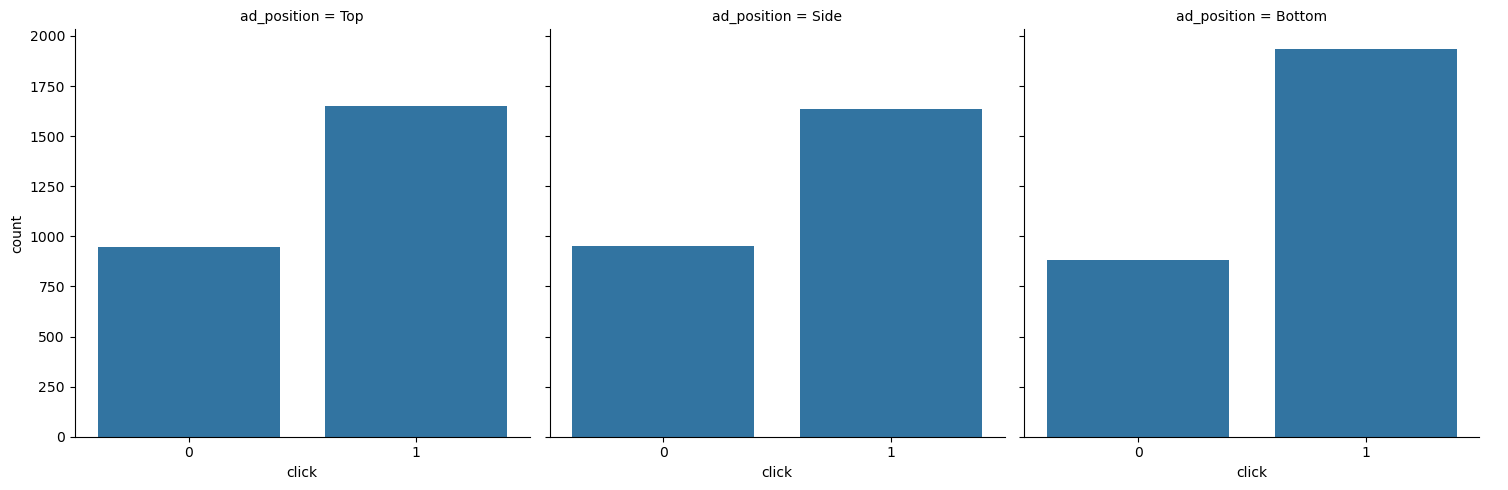

In [81]:
plt.figure(figsize=(10,5))
sns.catplot(x='click',col='ad_position',data=ad,kind='count')

<Figure size 1000x500 with 0 Axes>

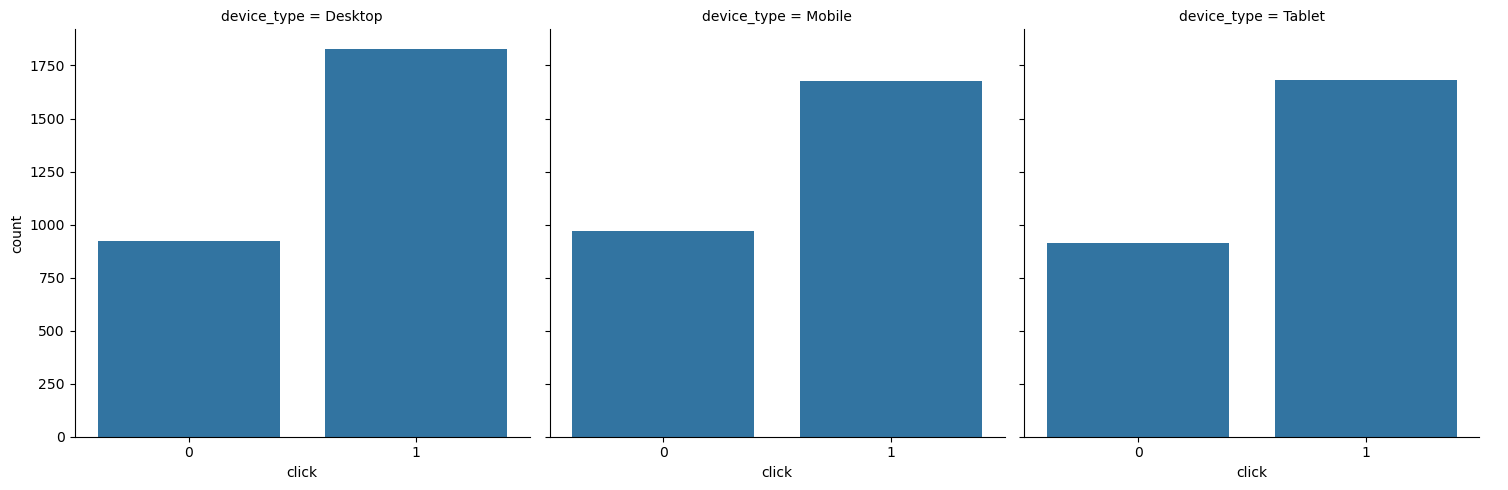

In [85]:
plt.figure(figsize=(10,5))
sns.catplot(x='click',col='device_type',data=ad,kind='count')

In [87]:
pd.crosstab(ad.click,ad.device_type)

device_type,Desktop,Mobile,Tablet
click,,,
0,925,971,914
1,1829,1678,1683


In [91]:
pd.crosstab(ad.click,ad.gender)

gender,Female,Male,Non-Binary
click,,,
0,628,619,611
1,1206,1191,1052


In [93]:
pd.crosstab(ad.click,ad.browsing_history)

browsing_history,Education,Entertainment,News,Shopping,Social Media
click,,,,,
0,383,367,399,349,384
1,646,808,577,635,670


In [95]:
pd.crosstab(ad.click,ad.time_of_day)

time_of_day,Afternoon,Evening,Morning,Night
click,,,,
0,634,725,712,713
1,1382,1233,1414,1187


In [97]:
pd.crosstab(ad.click,ad.ad_position)

ad_position,Bottom,Side,Top
click,,,
0,881,953,948
1,1936,1633,1649


In [145]:
ad_m=ad.copy()
ad_m.drop(['id','full_name'],axis=1,inplace=True)

ad_m['age']=ad_m['age'].fillna(ad_m['age'].median())

cols=['gender','device_type','ad_position','browsing_history','time_of_day']
for col in cols:
   ad_m[col]=ad_m[col].fillna(ad_m[col].mode()[0])

ad_m=pd.get_dummies(ad_m,columns=['gender','ad_position','device_type','browsing_history','time_of_day'],drop_first=True)
for col in ad_m.select_dtypes(include='bool').columns:
    ad_m[col]=ad_m[col].map({True:1,False:0})

In [147]:
ad_m


,age,click,gender_Male,gender_Non-Binary,ad_position_Side,ad_position_Top,device_type_Mobile,device_type_Tablet,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,22.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1,39.5,1,1,0,0,1,0,0,1,0,0,0,0,1,0
2,41.0,1,0,1,1,0,0,0,0,0,0,0,0,0,1
3,34.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
4,39.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39.5,0,0,0,0,1,1,0,0,0,0,0,0,1,0
9996,39.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0
9997,39.5,0,1,0,1,0,1,0,1,0,0,0,0,1,0
9998,39.5,1,0,0,0,0,0,0,0,0,1,0,0,1,0


<Axes: ylabel='age'>

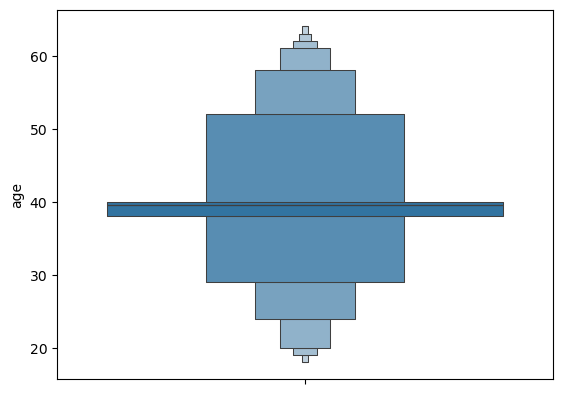

In [151]:
sns.boxenplot(ad_m['age'])

<Axes: >

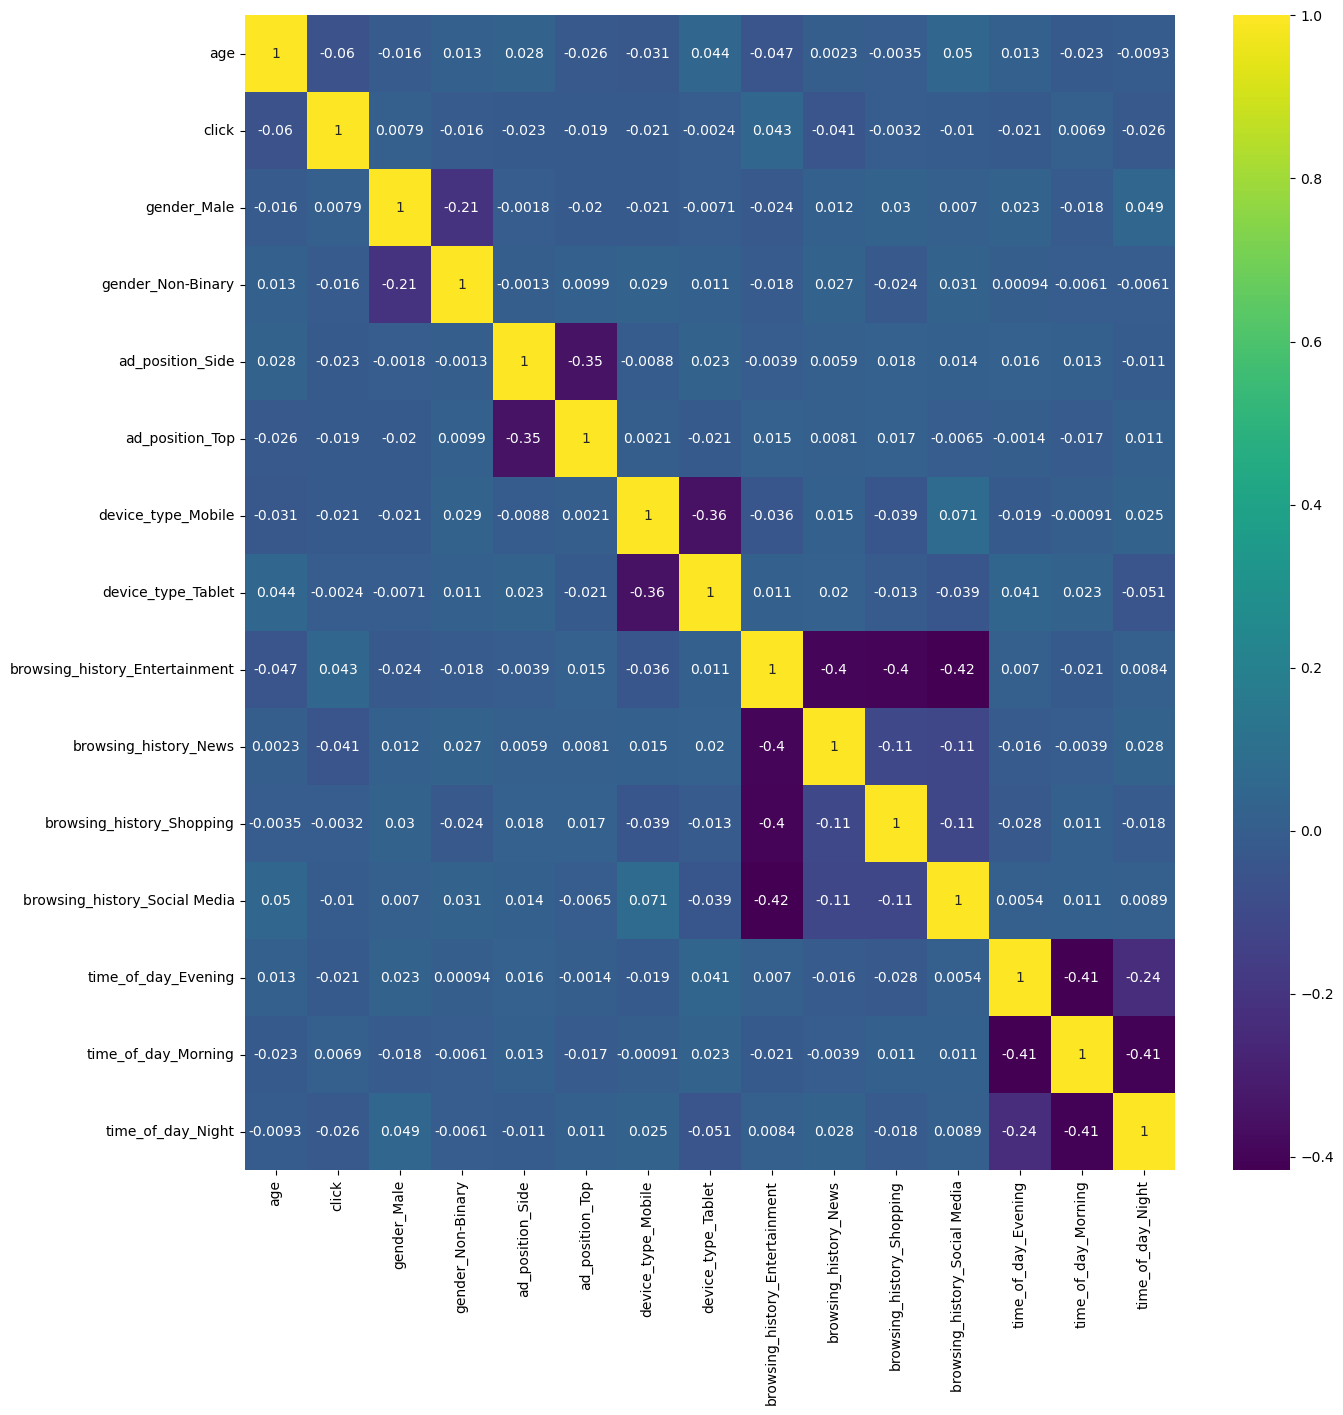

In [157]:
plt.figure(figsize=(15,15))
sns.heatmap(ad_m.corr(),annot=True,cmap='viridis')


In [233]:
df_train,df_test=train_test_split(ad_m,test_size=0.2,train_size=0.8,random_state=100)
X_train=df_train
X_test=df_test
y_train=df_train.pop('click')
y_test=df_test.pop('click')

In [235]:
type(X_train)

pandas.core.frame.DataFrame

In [268]:
scaler = StandardScaler()
X_train['age'] = scaler.fit_transform(X_train[['age']])
X_test['age'] = scaler.fit_transform(X_test[['age']])


In [270]:
vif=pd.DataFrame()
vif['features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
7,browsing_history_Entertainment,3.27
12,time_of_day_Morning,2.38
13,time_of_day_Night,1.69
11,time_of_day_Evening,1.65
3,ad_position_Side,1.50
4,ad_position_Top,1.50
5,device_type_Mobile,1.49
6,device_type_Tablet,1.49
10,browsing_history_Social Media,1.45
8,browsing_history_News,1.42


In [276]:
LR=LogisticRegression(max_iter=1000)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [278]:
y_train_pred=LR.predict(X_train)
y_test_pred=LR.predict(X_test)

report=classification_report(y_test,y_test_pred)

print('Accuracy of Logistic Regression model based on test is  : ', (metrics.accuracy_score(y_test, y_test_pred)))
print('Accuracy of Logistic Regression model based on train is  : ', (metrics.accuracy_score(y_train, y_train_pred)))
print(report)

Accuracy of Logistic Regression model based on test is  :  0.6485
Accuracy of Logistic Regression model based on train is  :  0.649875
              precision    recall  f1-score   support

           0       0.67      0.00      0.01       704
           1       0.65      1.00      0.79      1296

    accuracy                           0.65      2000
   macro avg       0.66      0.50      0.40      2000
weighted avg       0.65      0.65      0.51      2000

